In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
dir(measurement)

['__abstract__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_sa_automapbase_bookkeeping',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 '_sa_registry',
 'by_module',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'registry',
 'station',
 'tobs']

In [31]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(measurement.date)).scalar()
most_recent

'2017-08-23'

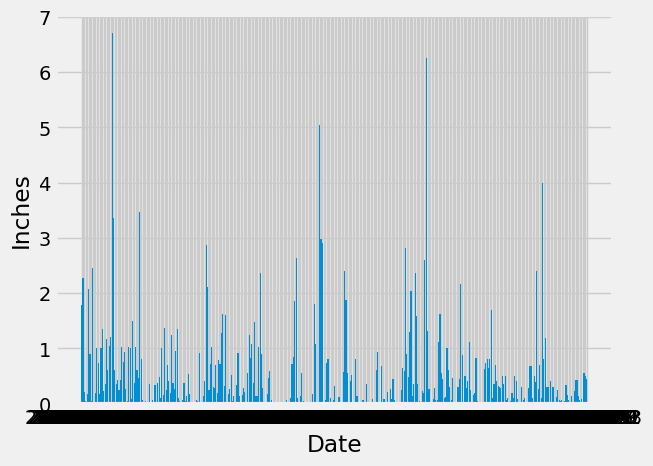

In [76]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_earlier = pd.to_datetime(most_recent).date() - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
query = f"SELECT date AS Date, prcp AS Precipitation FROM measurement WHERE date >= '{one_year_earlier}'"

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.read_sql(query, engine)

# Sort the dataframe by date
df = df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df["Date"], df["Precipitation"])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [79]:
# Use Pandas to calculate the summary statistics for the precipitation data
desc_df = pd.DataFrame(df["Precipitation"].describe())
desc_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [81]:
dir(station)

['__abstract__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_sa_automapbase_bookkeeping',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 '_sa_registry',
 'by_module',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'registry',
 'station']

In [83]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).count()
print(total_stations)

9


In [112]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

query = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

for station, count in query:
    print(f"Station: {station}, Count: {count}")
    

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [117]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps_query = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station=="USC00519281")

for min, max, avg in temps_query:
    print(f"Min: {min}, Max: {max}, Avg: {avg}")

Min: 54.0, Max: 85.0, Avg: 71.66378066378067


Text(0, 0.5, 'Frequency')

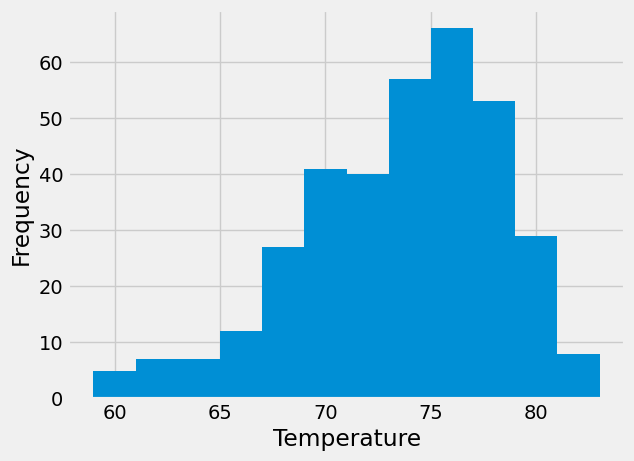

In [128]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = session.query(measurement.tobs).\
    filter(measurement.station=="USC00519281").\
    filter(measurement.date >= one_year_earlier)

temps_list = [temps[0] for temps in temperatures]
plt.hist(temps_list, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [129]:
# Close Session
session.close()